## Exploratory Data Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

C:\Users\saleh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Objectives:
##### Any business insights from this dataset you would like to share? Any recommendations for the business?
I would love to present the insights using the simple dashboard made in Tableau and a little storytelling, and speak further about this.

I compared different factors and features of vehicle listings to see how it influences how long it takes to sell, or turnover. I created a column subtracting the day a listing sold, by the day it first was listed to have a column with just the amount of days until a listing sold. 

##### Insights:

1) There are certain car makers that are not successfully being sold here, or are staying for a long time without selling. 

2) This tends to be more niche European car makers, and older generation vehicle brands like Oldsmobile.

3) After about 40k to 50k in vehicle price, cars tend to take longer to sell.

4) The sweet spot for pricing tends to be around the 25k mark, and usually the more mainstream middle-class car makers such as Honda, Toyota, VW, Chevrolet, Ford, etc.

5) RWD Wagons, FWD Trucks, and FWD/AWD Convertibles take longer to sell than the more traditional combinations of drivetrain and body types. Those listings deviated noticeably from the average turnover rate of roughly 12 days to sell across the province.

6) Durham Region, Simcoe County areas to the north of Toronto, as well as southern Ontario by Niagara region, tend to sell more slowly compared to the central GTA.

7) This regional slowdown could be due to population density, however.

---

##### Recommendations:

1) If there is an algorythm that processes cars that the company lists, reduce the values for underperforming car makers, as dead inventory is a cost or a loss.

2) Focus on areas of roughly 15-30k price range cars, from mainstream makers such as Honda, Toyota, Hyundai, Kia, Mazda, and body types such as Minivans or Sedans which tend to perform well, and sell quickly compared to other combinations.

3) Focus on other parts of operations or partners in underperforming regions to see how turnover can be increased.

4) Utilize Natural Language Processing in order to create better Recommendation systems, or even to predict which word clusters in describing your vehicles would result in increased turnover, increasing revenue.

5) I created a recommendation system at the end of the notebook which recommends 5 vehicles based on which vehicle index you input into it. The data is cleaned for further text analysis as well.

##### Any issue with the dataset you find? What process/steps do you take to solve it?
Some columns were unnecessary for the purposes of cleaning and model building.
Engine input on the front end might lead to better workflow for analysis. Free form is difficult to work with.
Trim column might be better as a radio button selector, as this freeform way makes it incredibly unstandardized.

I dropped the columns that were not necessary for model building right now for initial stages of exploration.
I bucketed the engine column into standardized categories of engine types to allow its data to be used, while simplyfing its openendedness.
I did not use the Trim column this time due to time constraints, but I can see work being done on the Natural Language Processing side of things to gather some insights from it with time.

##### Any other problems you are running into?
Some cities that are listed were unable to be identified for visualization by Tableau, even with Spatial Data, which was a little inconvenient, would love to get Spatial Data with some time to have a better visualization of each region in the Tableau Map.

##### What steps do you take to clean/transform the data?
Traditional data wrangling steps to clean and transform the data.

I tend to have an idea or a question in my mind that I want the data to help me solve. I knew I wanted to try Natural Language Processing (NLP) with the description column to see if I can use it to predict or recommend other listings or sales.

I also knew I wanted to explore a specific metric for business insights. Businesses want revenue. With this dataset, the one that naturally comes into mind is a measure of how quickly items sell. The faster a listing sells, given that there are no constraints elsewhere in the business pipeline, the higher the revenue. This is important as well for smaller businesses with smaller margins, as volume leads to profits. I created a column 'days_until_sold' and subtracted the date last seen from the first date seen to get the numbers. However, this dataset was pulled on May 3rd. It would show as the last date seen for any vehicle that was in the listing website on the day it was pulled, and thus, not yet sold.

I removed the listings and noted how many there were. 16700 listings on May 3rd, 2021. This means that the inventory was ~16700 cars.

The carfax_url column I interpreted it as whether the listing had a carfax report performed on it or not. As such, I converted the NULLs to False, and the ones with a URL to True, and simply made it a boolean column, while renaming it to carfax_report to more accurately describe the contents of the column: whether or not it has a carfax report.

Following the creation of these column, I went through the other columns to explore and understand the data. I converted the date columns into datetime, bucketed items to simply columns that had too many cateogries or entries, such as engine types, transmissions, body types, as well as and general grammatic changes such as capitalization, etc.
After the bucketing and clearing of the NULLs, I separated the dataset into two versions. One which will remain mostly numeric for any visualizations and analytics I may want to do, and one where the description column stays and I process the dataset further for Natural Language Processing, or Machine Learning tools, etc.

##### If you have more time, what steps would you add to your work?
I would bucket some vehicle features more deliberately. There are a fair bit of NULL values where my own car knowledge lets me know what is the engine or drivetrain in that listing. I would filter out different categories by specific keywords in other parts of the listing. This would take a bit more time to do, but if I were creating a script to automate the way I want a dataset to be cleaned, it is worth the time in the long term, as it would make the data better representative of the inventory, and thus, increase model performances.

Following through with the cleaned text, I can also use the descriptions for each posting to try and predict turnover, or quickness of sale. This can lead to specific words or ways being used to describe listings to increase turnover and revenue. This would be a great way to leverage the description box data better.

##### What other application/business problem could this dataset help to solve?
Depending on what metric you want to focus on, it can help differently. A pricing model can be initiated here, using the different vehicle information. I performed a heatmap of the correlation matrix and it showed many different variables being correlated with the price of a listing, including the typical mileage, year, and make, etc.
For example, mileage plays a large negative role on the price of a vehicle, more so than the positive correlation the year of a car has. Whether or not a car had a carfax report was correlated with price as well, which is interesting. All of these factors can be used more effectively in creating a pricing model.

### Understanding and Cleaning the Data

In [2]:
# Load in the data
df = pd.read_csv('vehicles.csv')
df

,id,first_date_seen,last_date_seen,vin,year,make,model,trim,mileage,price,...,engine,passengers,description,carfax_url,is_private,seller_name,city,province,longitude,latitude
0,243517,2021-04-05,2021-05-03,2g2wp552071227768,2007,Pontiac,Grand Prix,4dr Sdn,166014.0,3000.0,...,NaN,NaN,"Pontiac Grand Prix 2007, mint condition, clean...",NaN,True,Private Seller,MISSISSAUGA,ON,-79.608894,43.531761
1,341545,2021-04-16,2021-05-03,5FRYD4H26GB501859,2016,Acura,MDX,AWD|LEATHER|SUN ROOF|BACK UP CAM|HEATED SEATS|...,97902.0,24989.0,...,3.5L 6cyl,7.0,2016 Acura MDX SH-AWD equipped with 3.5L V6 en...,https://vhr.carfax.ca/main?id=19Q9m3cFZqcImHGA...,False,Gorrud's Auto Group,Milton,ON,-79.889107,43.525890
2,345845,2021-04-16,2021-05-03,NaN,2005,Infiniti,G35X,Sedan,108000.0,6400.0,...,NaN,NaN,"Runs very smooth just safetied last week, no d...",NaN,True,Private Seller,MISSISSAUGA,ON,-79.594269,43.619488
3,254761,2021-04-08,2021-05-03,1FTFW1EF1GFC52035,2016,Ford,F-150,XL,186750.0,33821.0,...,5.0L 8cyl,NaN,"At Barrie Ford, we've proudly dedicated oursel...",https://vhr.carfax.ca/main?id=sdxVNAZePXjizBpB...,False,BARRIE FORD,Barrie,ON,-79.690971,44.333801
4,256183,2021-04-08,2021-05-03,2HKRM4H50FH112277,2015,Honda,CR-V,"EX, AWD, One Owner, Accident Free & Certified!",124394.0,17443.0,...,2.4,5.0,"EX, AWD, Cloth Interior, Power Drivers Seat, H...",https://vhr.carfax.ca/main?id=PuOEHO4lvLFFsJ8X...,False,TOP PICKS AUTO SALES,North Bay,ON,-79.452217,46.290520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52231,341676,2021-04-16,2021-04-26,NaN,2016,Hyundai,Sonata,GLS *SUNROOF*,72592.0,13950.0,...,NaN,NaN,"SUNROOF, HEATED SEATS, HEATED STEERING WHEEL, ...",NaN,False,Quality Car Sales,Kitchener,ON,-80.449226,43.410999
52232,379154,2021-04-24,2021-05-03,2FMPK4J91JBC41221,2018,Ford,Edge,"SEL,AWD, Navigation, Local Trade!!",41134.0,24995.0,...,3.5,NaN,NaN,https://vhr.carfax.ca/main?id=yDeHY1WFvnRQtC7t...,False,LALLY FORD SALES,Tilbury,ON,-82.445862,42.263359
52233,368415,2021-04-22,2021-05-03,1HGCT1B85HA800359,2017,Honda,Accord Coupe,White/Black Touring / Fully Loaded / Sunroof / No,73000.0,25999.0,...,4 Cylinder Engine,5.0,**RARE** **Mint (Like New)** **White on Black ...,NaN,False,Sal's One Motors,Mississauga,ON,-79.587181,43.578979
52234,369285,2021-04-22,2021-05-01,1FM5K8GT5JGB00503,2018,Ford,Explorer,Sport,59919.0,37988.0,...,3.5L V6,NaN,Sport 4WD We do our best to ensure pricing and...,https://vhr.carfax.ca/main?id=uP4MVTGg9eGIQL5z...,False,FORMULA FORD LINCOLN,Pickering,ON,-79.105164,43.824051


In [3]:
# Check over the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52236 entries, 0 to 52235
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               52236 non-null  int64  
 1   first_date_seen  52236 non-null  object 
 2   last_date_seen   52236 non-null  object 
 3   vin              41662 non-null  object 
 4   year             52236 non-null  int64  
 5   make             52236 non-null  object 
 6   model            52236 non-null  object 
 7   trim             48507 non-null  object 
 8   mileage          52129 non-null  float64
 9   price            52232 non-null  float64
 10  color            48810 non-null  object 
 11  body_type        48624 non-null  object 
 12  drivetrain       49503 non-null  object 
 13  transmission     50119 non-null  object 
 14  fuel_type        51012 non-null  object 
 15  engine           39242 non-null  object 
 16  passengers       21987 non-null  float64
 17  description 

In [4]:
# Any nulls?
df.isna().sum()

id                     0
first_date_seen        0
last_date_seen         0
vin                10574
year                   0
make                   0
model                  0
trim                3729
mileage              107
price                  4
color               3426
body_type           3612
drivetrain          2733
transmission        2117
fuel_type           1224
engine             12994
passengers         30249
description         4237
carfax_url         26872
is_private             0
seller_name           16
city                   0
province               0
longitude              0
latitude               0
dtype: int64

In [5]:
# Remove outliers that are 3 standard deviations away in price and mileage to remove listings that can skew things.
df[(np.abs(stats.zscore(df['price'])) < 3)]
df[(np.abs(stats.zscore(df['mileage'])) < 3)]

C:\Users\saleh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
C:\Users\saleh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


,id,first_date_seen,last_date_seen,vin,year,make,model,trim,mileage,price,...,engine,passengers,description,carfax_url,is_private,seller_name,city,province,longitude,latitude


For each column, it computes the Z-score of all values in a column, relative to the mean and standard deviation.
It then takes the Z-score only if it is below the threshold.
Finally, the result of this condition is used to index the dataframe.

I will tidy up nulls as I explore each column. 

In [6]:
# I can change some datatypes to a more usable format, like the dates into datetime
df['first_date_seen'] = pd.to_datetime(df['first_date_seen'])
df['last_date_seen'] = pd.to_datetime(df['last_date_seen'])

##### Text descriptions can be used for NLP or Sentiment Analysis to see which word clusters used to describe a car lead to it being sold more quickly. Will be performed cleaning with the intention of having an NLP ready dataset, as well as a cleaned dataset for SQL and Tableau usage.

I can remove Carfax URL if that is not needed here for general exploration. However, there are lots of NULLs here. Do listings without a carfax URL mean that Carfax was not performed on them? If it does not mean that, it can be removed. If it does, I can test and see whether having Carfax reports leads to faster sales, prices, etc.

In [7]:
# Can drop some columns that won't be needed here in Python EDA.
df2 = df.drop(['color', 'vin', 'passengers', 'id', 'seller_name', 'trim', 'longitude', 'latitude'], axis=1)
df2

,first_date_seen,last_date_seen,year,make,model,mileage,price,body_type,drivetrain,transmission,fuel_type,engine,description,carfax_url,is_private,city,province
0,2021-04-05,2021-05-03,2007,Pontiac,Grand Prix,166014.0,3000.0,Sedan,FWD,Automatic,Gasoline,NaN,"Pontiac Grand Prix 2007, mint condition, clean...",NaN,True,MISSISSAUGA,ON
1,2021-04-16,2021-05-03,2016,Acura,MDX,97902.0,24989.0,SUV,AWD,9 Speed Automatic,Premium Unleaded,3.5L 6cyl,2016 Acura MDX SH-AWD equipped with 3.5L V6 en...,https://vhr.carfax.ca/main?id=19Q9m3cFZqcImHGA...,False,Milton,ON
2,2021-04-16,2021-05-03,2005,Infiniti,G35X,108000.0,6400.0,Sedan,AWD,Automatic,Gasoline,NaN,"Runs very smooth just safetied last week, no d...",NaN,True,MISSISSAUGA,ON
3,2021-04-08,2021-05-03,2016,Ford,F-150,186750.0,33821.0,Truck,4x4,6 Speed Automatic,Gas,5.0L 8cyl,"At Barrie Ford, we've proudly dedicated oursel...",https://vhr.carfax.ca/main?id=sdxVNAZePXjizBpB...,False,Barrie,ON
4,2021-04-08,2021-05-03,2015,Honda,CR-V,124394.0,17443.0,SUV,AWD,Automatic,Gas,2.4,"EX, AWD, Cloth Interior, Power Drivers Seat, H...",https://vhr.carfax.ca/main?id=PuOEHO4lvLFFsJ8X...,False,North Bay,ON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52231,2021-04-16,2021-04-26,2016,Hyundai,Sonata,72592.0,13950.0,Sedan,FWD,Automatic,Gas,NaN,"SUNROOF, HEATED SEATS, HEATED STEERING WHEEL, ...",NaN,False,Kitchener,ON
52232,2021-04-24,2021-05-03,2018,Ford,Edge,41134.0,24995.0,SUV,AWD,Automatic,Gas,3.5,NaN,https://vhr.carfax.ca/main?id=yDeHY1WFvnRQtC7t...,False,Tilbury,ON
52233,2021-04-22,2021-05-03,2017,Honda,Accord Coupe,73000.0,25999.0,Coupe,FWD,CVT,Gas,4 Cylinder Engine,**RARE** **Mint (Like New)** **White on Black ...,NaN,False,Mississauga,ON
52234,2021-04-22,2021-05-01,2018,Ford,Explorer,59919.0,37988.0,SUV,AWD,6 Speed Automatic,Gas,3.5L V6,Sport 4WD We do our best to ensure pricing and...,https://vhr.carfax.ca/main?id=uP4MVTGg9eGIQL5z...,False,Pickering,ON


In [8]:
df2.duplicated().sum()

70

In [9]:
df2.loc[df2.duplicated(), :]

,first_date_seen,last_date_seen,year,make,model,mileage,price,body_type,drivetrain,transmission,fuel_type,engine,description,carfax_url,is_private,city,province
724,2021-05-02,2021-05-03,2021,BMW,228 Gran Coupe,90.0,50656.0,Sedan,AWD,8 Speed Automatic,Premium Unleaded,2.0L 4cyl,"No Charge Scheduled Maintenance 4yr/80k, Premi...",NaN,False,Oakville,ON
3255,2021-05-01,2021-05-01,2021,Jeep,Cherokee,1000.0,35988.0,SUV,4x4,9 Speed Automatic,Regular Unleaded,2.4L MultiAir I-4 Zero Evap w/ESS,SPRING SAVINGS SELL OFF EVENT See the epitome ...,NaN,False,Tilbury,ON
5422,2021-05-01,2021-05-03,2021,Volkswagen,Golf,90.0,26869.0,Hatchback,FWD,8 Speed Automatic,Gas,4 Cylinder Engine,"Since Hamilton Volkswagen first opened, custom...",NaN,False,Hamilton,ON
6861,2021-05-02,2021-05-03,2020,Infiniti,QX60,90.0,55795.0,SUV,AWD,CVT,Gas,V6 Cylinder Engine,We are here to assist you in finding your perf...,NaN,False,Markham,ON
7296,2021-04-29,2021-04-29,2013,Honda,Civic,78090.0,2000.0,Sedan,NaN,Automatic,Gasoline,NaN,For more info please contact me directly on my...,NaN,True,BRAMPTON,ON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49248,2021-04-27,2021-05-03,2010,Honda,CR-V,170639.0,9500.0,NaN,AWD,Automatic,Gasoline,NaN,2010 honda crv. $9500 170639 kms. Auto windows...,NaN,True,NORTH YORK,ON
50015,2021-04-28,2021-05-03,2020,Mazda,CX-30,5.0,34429.0,SUV,AWD,6 Speed Automatic,Gas,4 Cylinder Engine,**OVER 40 MAZDA3's IN VARIOUS TRIMS**HERE AT K...,NaN,False,Kitchener,ON
50145,2021-04-17,2021-05-03,2015,Nissan,Sentra,85000.0,8588.0,Sedan,FWD,Automatic,Gas,1.8,AUTO LESNER DIRECT is open by appointment only...,NaN,False,Hamilton,ON
50973,2021-04-15,2021-05-03,2017,Mitsubishi,RVR,158233.0,14425.0,SUV,4x4,Automatic,Gas,2.4,"AWD, EXCELLENT SHAPE, PRICED TO SELL. this veh...",NaN,False,Waterloo,ON


There are 70 duplicated rows, or listings. However, there is a unique identifier for the data, meaning that they are likely different listings of maybe the same car. Overall, 70 out of 35,000 is a minute amount, so keeping them will not affect model building accuracy and further exploration.

In [10]:
# Work down the NULLs
df2.isnull().sum()

first_date_seen        0
last_date_seen         0
year                   0
make                   0
model                  0
mileage              107
price                  4
body_type           3612
drivetrain          2733
transmission        2117
fuel_type           1224
engine             12994
description         4237
carfax_url         26872
is_private             0
city                   0
province               0
dtype: int64

In [11]:
# Remove all rows with last_date_seen at may 3rd, and keep those before as this data was pulled on May 3rd. This will make the ratios skewed for the purposes of calculating turn over rate of vehicles.
df2['last_date_seen'] = df2[~(df['last_date_seen'] < '2021-05-03')]
df2['last_date_seen'].isna().sum()

16699

##### The number of NULLs introduced now are inventory remaining after May 3rd, 2021 for this business.
##### On May 3rd, 2021, there were 16699 cars for sale on the listing site.

This insight can be used going forward. Also, these NULLs are going to be removed for the model building and exploration going forward.

In [12]:
df2.dropna(subset=['last_date_seen'], inplace=True)
df2.reset_index(drop=True, inplace=True)

In [13]:
df2['city'] = df2.city.str.capitalize()

In [14]:
df2

,first_date_seen,last_date_seen,year,make,model,mileage,price,body_type,drivetrain,transmission,fuel_type,engine,description,carfax_url,is_private,city,province
0,2021-04-05,2021-04-05 00:00:00,2007,Pontiac,Grand Prix,166014.0,3000.0,Sedan,FWD,Automatic,Gasoline,NaN,"Pontiac Grand Prix 2007, mint condition, clean...",NaN,True,Mississauga,ON
1,2021-04-16,2021-04-16 00:00:00,2016,Acura,MDX,97902.0,24989.0,SUV,AWD,9 Speed Automatic,Premium Unleaded,3.5L 6cyl,2016 Acura MDX SH-AWD equipped with 3.5L V6 en...,https://vhr.carfax.ca/main?id=19Q9m3cFZqcImHGA...,False,Milton,ON
2,2021-04-16,2021-04-16 00:00:00,2005,Infiniti,G35X,108000.0,6400.0,Sedan,AWD,Automatic,Gasoline,NaN,"Runs very smooth just safetied last week, no d...",NaN,True,Mississauga,ON
3,2021-04-08,2021-04-08 00:00:00,2016,Ford,F-150,186750.0,33821.0,Truck,4x4,6 Speed Automatic,Gas,5.0L 8cyl,"At Barrie Ford, we've proudly dedicated oursel...",https://vhr.carfax.ca/main?id=sdxVNAZePXjizBpB...,False,Barrie,ON
4,2021-04-08,2021-04-08 00:00:00,2015,Honda,CR-V,124394.0,17443.0,SUV,AWD,Automatic,Gas,2.4,"EX, AWD, Cloth Interior, Power Drivers Seat, H...",https://vhr.carfax.ca/main?id=PuOEHO4lvLFFsJ8X...,False,North bay,ON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35532,2021-04-15,2021-04-15 00:00:00,2014,Toyota,Corolla,180276.0,8495.0,Sedan,FWD,Automatic,Gas,1.8,LE | Back Up Camera | Heated Seats |Automatic ...,https://vhr.carfax.ca/main?id=zpgE4nQKwv6K4UCz...,False,Woodbridge,ON
35533,2021-04-03,2021-04-03 00:00:00,2017,Dodge,Journey,100584.0,19499.0,SUV,AWD,6 Speed Automatic,Gas,3.6L 6cyl,Absolutely Great Vehicle! Loaded! Rear DVD! Fe...,NaN,False,Kingston,ON
35534,2021-04-24,2021-04-24 00:00:00,2018,Ford,Edge,41134.0,24995.0,SUV,AWD,Automatic,Gas,3.5,NaN,https://vhr.carfax.ca/main?id=yDeHY1WFvnRQtC7t...,False,Tilbury,ON
35535,2021-04-22,2021-04-22 00:00:00,2017,Honda,Accord Coupe,73000.0,25999.0,Coupe,FWD,CVT,Gas,4 Cylinder Engine,**RARE** **Mint (Like New)** **White on Black ...,NaN,False,Mississauga,ON


### Exploration

For Carfax URL, I am going to interpret this as whether or not this listing has a Carfax report on it. This might be correlated to something else, like quickness of the sale?

In [15]:
# Renaming column to better reflect its usage.
df2.rename(columns={'carfax_url': 'carfax_report'}, inplace=True)

In [16]:
# Replace the url link in the column with Yes, and fill in the NULLs with No, to have our answer.
df2['carfax_report'].fillna('No', inplace=True)
df2.loc[~df2['carfax_report'].isin(['No']), 'carfax_report'] = 'Yes'
df2['carfax_report'].value_counts()

No     18145
Yes    17392
Name: carfax_report, dtype: int64

In [17]:
# True and False conversion of the report to be a boolean column.
df2['carfax_report'] = df2['carfax_report'].map({'Yes':True ,'No':False})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35537 entries, 0 to 35536
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   first_date_seen  35537 non-null  datetime64[ns]
 1   last_date_seen   35537 non-null  object        
 2   year             35537 non-null  int64         
 3   make             35537 non-null  object        
 4   model            35537 non-null  object        
 5   mileage          35464 non-null  float64       
 6   price            35537 non-null  float64       
 7   body_type        33378 non-null  object        
 8   drivetrain       33964 non-null  object        
 9   transmission     34253 non-null  object        
 10  fuel_type        34863 non-null  object        
 11  engine           27521 non-null  object        
 12  description      32642 non-null  object        
 13  carfax_report    35537 non-null  bool          
 14  is_private       35537 non-null  bool 

Honda            3295
Toyota           3226
Ford             2648
Hyundai          2395
Chevrolet        2176
Nissan           2031
BMW              1932
Volkswagen       1600
Mercedes-Benz    1552
Dodge            1461
Mazda            1392
Jeep             1311
Kia              1305
Audi             1072
Ram               965
Subaru            837
Lexus             819
Acura             695
GMC               675
Infiniti          431
Buick             373
Cadillac          367
Porsche           360
Mitsubishi        357
Land Rover        351
Chrysler          336
MINI              246
Volvo             201
Lincoln           194
Jaguar            177
Pontiac           142
Tesla              98
Fiat               70
Scion              57
Maserati           42
Genesis            26
Saturn             24
Suzuki             24
Alfa Romeo         24
Ferrari            23
Lamborghini        23
Bentley            21
Aston Martin       17
Oldsmobile         15
smart              14
Mercedes-A

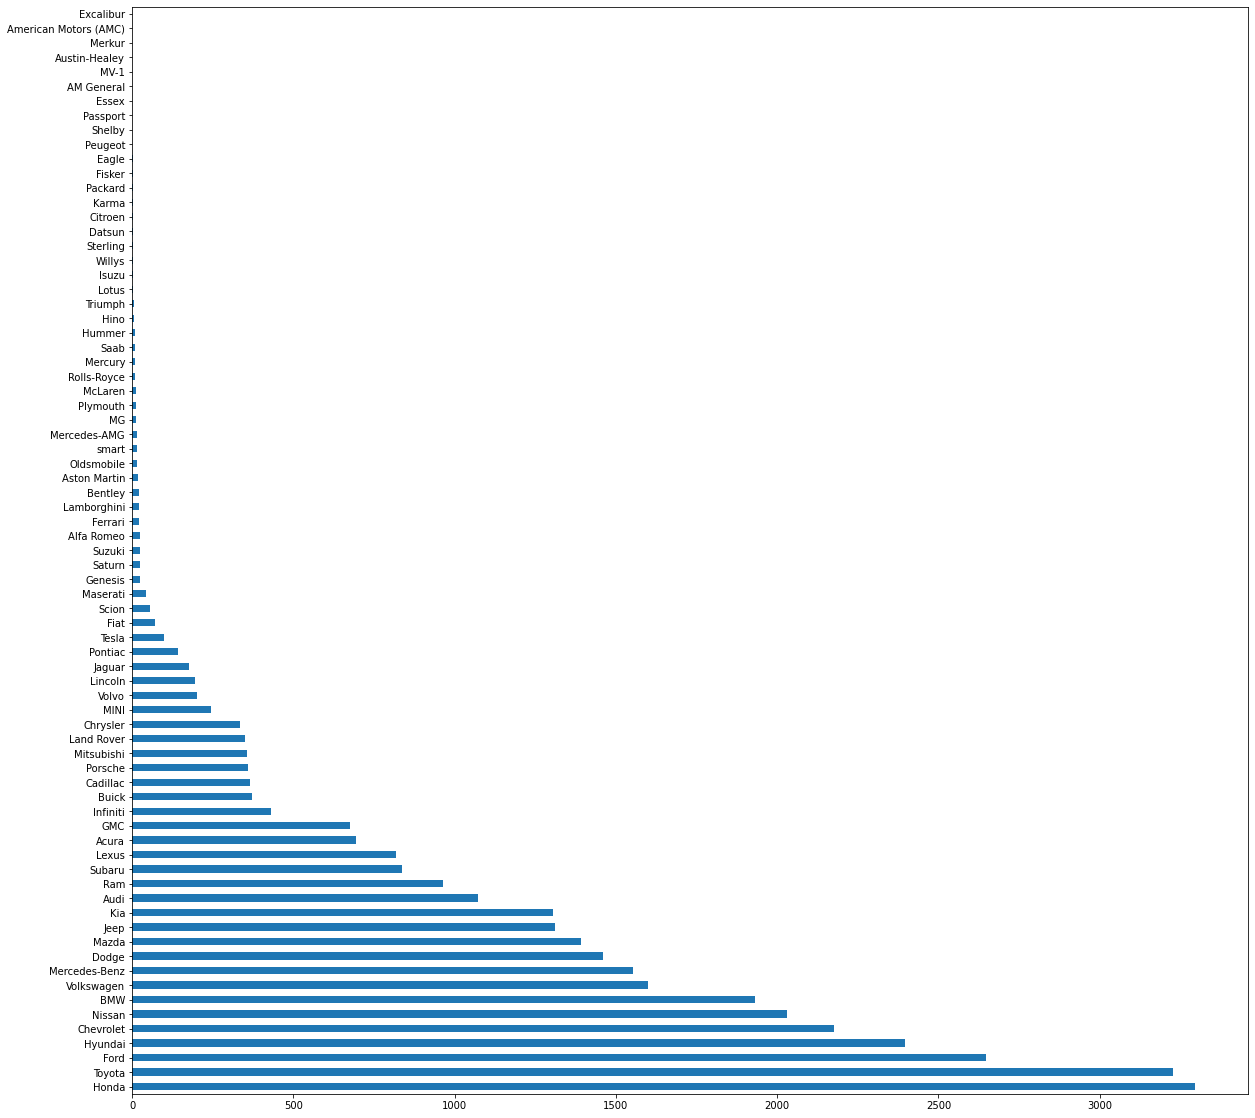

In [18]:
# Car make in the listing?
df2['make'].value_counts().plot(figsize=(20,20), kind='barh')
df2['make'].value_counts().head(60)

In [19]:
# Fuel types?
df2['fuel_type'].value_counts()

Gas                         24085
Gasoline                     6750
Premium Unleaded              816
Regular Unleaded              711
Flexible                      675
Diesel                        664
Gasoline Hybrid               518
Electric                      271
Other                         168
Gasoline - Hybrid             115
E85- Gasoline(Flex Fuel)       75
Other/Don’t Know               10
Gasoline Fuel                   5
Name: fuel_type, dtype: int64

In [20]:
1224/52236*100

2.3432115782219163

Some overlap here can be addressed. Combining some of these types can make it more clean. For the NULL values here, because it counts for roughly 2.3% of the overall data, I can comfortably fill the nulls here with Gasoline to clean it up. It is by far the most common fuel type, so filling with the Mode of the column makes sense.

In [21]:
df2['fuel_type'].fillna('Gasoline', inplace=True)

In [22]:
df2.loc[df2['fuel_type'].str.contains('Hybrid'), 'fuel_type'] = 'Hybrid'
df2.loc[df2['fuel_type'].str.contains('Gas'), 'fuel_type'] = 'Gasoline'
df2.loc[df2['fuel_type'].str.contains('Unleaded'), 'fuel_type'] = 'Gasoline'
df2.loc[df2['fuel_type'].str.contains('E85'), 'fuel_type'] = 'Flexible'
df2.loc[df2['fuel_type'].str.contains('Other'), 'fuel_type'] = 'Other'

In [23]:
df2['fuel_type'].value_counts()

Gasoline    33116
Flexible      675
Diesel        664
Hybrid        633
Electric      271
Other         178
Name: fuel_type, dtype: int64

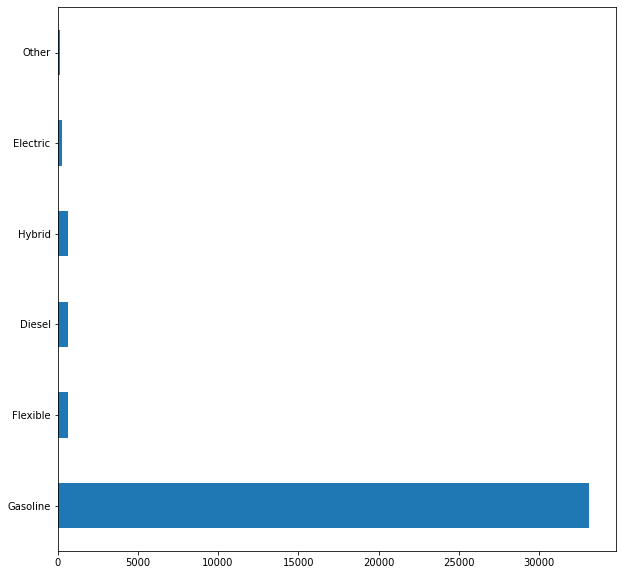

In [24]:
df2['fuel_type'].value_counts().plot(figsize=(10,10), kind='barh')

The [fuel_type] column looks good and is very clear now.

In [25]:
# Body type?
df2['body_type'].value_counts()

SUV                       12207
Sedan                     10879
Hatchback                  2726
Truck                      2004
Coupe                      1761
Minivan                    1400
Wagon                       730
Convertible                 644
Crew Cab                    322
Compact                     209
Regular Cab                 166
Truck Crew Cab              120
Super Crew                   33
Extended Cab                 29
Quad Cab                     29
Station Wagon                24
Truck Quad Cab               19
Truck Double Cab             16
Truck Extended Cab           15
Super Cab                    12
Truck Regular Cab             8
Roadster                      7
Mega Cab                      4
Truck Super Cab               3
Truck King Cab                2
Cabriolet                     2
Truck Long Regular Cab        1
Cutaway                       1
Truck Mega Cab                1
Truck Long Double Cab         1
Truck Chassis                 1
Truck Sh

How about the NULLs here?

In [26]:
df2['body_type'].isna().sum()

2159

In [27]:
3612/52236*100

6.914771422007811

I chose to use Other to fill it for initial exploration. A deeper cleaning might use other columns to determine the correct place for it to be. It is however, 7% of the overall data.

In [28]:
df2['body_type'].fillna('Other', inplace=True)

Lots of bucketing can occur here.

In [29]:
# Bucketing body types
df2.loc[df2['body_type'].str.contains('Truck|Cab|Crew|Cutaway'), 'body_type'] = 'Truck'
df2.loc[df2['body_type'].str.contains('Wagon|Avant|Hatchback'), 'body_type'] = 'Wagon'
df2.loc[df2['body_type'].str.contains('Roadster|Coupe'), 'body_type'] = 'Sedan'
df2.loc[df2['body_type'].str.contains('Compact'), 'body_type'] = 'Other'

In [30]:
df2['body_type'].value_counts()

Sedan          12647
SUV            12207
Wagon           3480
Truck           2791
Other           2368
Minivan         1400
Convertible      644
Name: body_type, dtype: int64

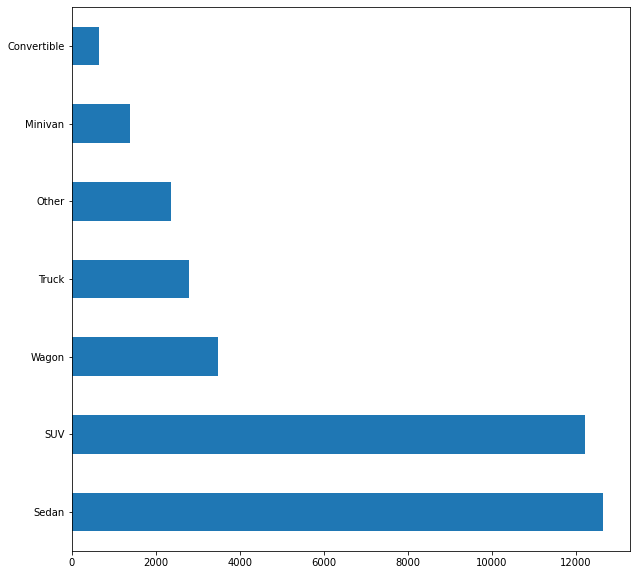

In [31]:
df2['body_type'].value_counts().plot(figsize=(10,10), kind='barh')

Workable now.

In [32]:
# Drivetrain?
df2['drivetrain'].value_counts()

FWD    13574
AWD    12785
4x4     3491
RWD     2339
4WD     1129
4X4      641
2WD        5
Name: drivetrain, dtype: int64

In [33]:
df2['drivetrain'].isna().sum()

1573

For now, I can change the nulls into Other. In deeper cleaning, I would fill in the drivetrain by inferring its category through body_type of the vehicle. That would be a more accurate way to group them

In [34]:
df2['drivetrain'].fillna('Other', inplace=True)

In [35]:
# Bucket the 4 X 4 and 4X4
df2.loc[df2['drivetrain'].str.contains('x'), 'drivetrain'] = '4X4'

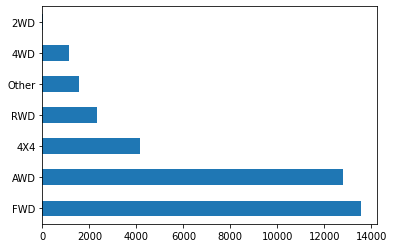

In [36]:
df2['drivetrain'].value_counts().plot(kind='barh')

This looks clean for initial searches.

In [37]:
# Engine?
df2['engine'].value_counts()

4 Cylinder Engine                        7430
V6 Cylinder Engine                       2709
2.0L 4cyl                                1106
8 Cylinder Engine                         910
2                                         809
                                         ... 
5.3 Vortec                                  1
3.6L V6 24V GDI DOHC Flexible Fuel          1
303HP 3.7L V6 Cylinder Engine               1
4.4TT                                       1
2.4L DOHC 16-VALVE I4 DUAL VVT ENGINE       1
Name: engine, Length: 1574, dtype: int64

In [38]:
df2['engine'].isna().sum()

8016

In [39]:
df2['engine'].fillna('Unknown', inplace=True)

A lot of NULLs here. Again into other for now, but deeper cleaning, can see based on model what the engine type would be and bucket them appropriately.

Not as useful for simpler data exploration. Different types of engines and platforms are used for different makes and models. I can drop the ones that are too specific to get a general guage of the primary types of engines, such as 4, 6, 8 cylinder engines.

In [40]:
# Bucketing
df2.loc[df2['engine'].str.contains('V4|4cyl|4 cyl|4-Cylinder|4-CYLINDER|4CYL|4 CYL|4-Cyl|4-CYL|4'), 'engine'] = '4 Cylinder Engine'
df2.loc[df2['engine'].str.contains('V6|6cyl|6 cyl|6-Cylinder|6-CYLINDER|6CYL|6 CYL|6-Cyl|6-CYL|6'), 'engine'] = '6 Cylinder Engine'
df2.loc[df2['engine'].str.contains('V8|8cyl|8 cyl|8-Cylinder|8-CYLINDER|8CYL|8 CYL|8-Cyl|8-CYL|8'), 'engine'] = '8 Cylinder Engine'

In [41]:
df2.loc[df2['engine'].str.contains('FLEX'), 'engine'] = 'Flexible Fuel Engine'
df2.loc[df2['engine'].str.contains('Electric'), 'engine'] = 'Electric Engine'
df2.loc[df2['engine'].str.contains('Diesel'), 'engine'] = 'Diesel Engine'

In [42]:
df2['engine'].value_counts()

4 Cylinder Engine                 15349
Unknown                            8016
6 Cylinder Engine                  6770
8 Cylinder Engine                  1941
2                                   809
                                  ...  
2.0d                                  1
2.0L DOHC Turbo Hybrid, 315 HP        1
Gas 5.3L/325                          1
gas                                   1
2.5 - litre                           1
Name: engine, Length: 223, dtype: int64

In [43]:
# Bucket the rest into other.
df2.loc[~df2['engine'].isin(['4 Cylinder Engine', '6 Cylinder Engine', '8 Cylinder Engine', 'Unknown']), 'engine'] = 'Other'

In [44]:
df2['engine'].value_counts()

4 Cylinder Engine    15349
Unknown               8016
6 Cylinder Engine     6770
Other                 3461
8 Cylinder Engine     1941
Name: engine, dtype: int64

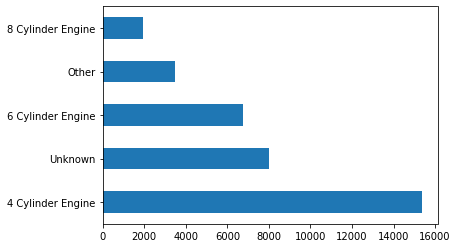

In [45]:
df2['engine'].value_counts().plot(kind='barh')

Clean enough for now, however, there is a large amount of other / unknowns that can skew results. This column should be revised in some way.

In [46]:
# Transmission
df2['transmission'].value_counts()

Automatic                            19062
6 Speed Automatic                     4322
CVT                                   3224
8 Speed Automatic                     2851
Manual                                1689
9 Speed Automatic                      741
7 Speed Automatic                      673
6 Speed Manual                         460
5 Speed Automatic                      360
4 Speed Automatic                      245
10 Speed Automatic                     206
5 Speed Manual                         156
7 Speed Automatic with auto-shift       84
1 Speed Automatic                       82
6 Speed Automatic with auto-shift       52
8 Speed Automatic with auto-shift       26
7 Speed Manual                          13
4 Speed Manual                           4
Sequential                               1
3 Speed Automatic                        1
5 Speed Automatic with auto-shift        1
Name: transmission, dtype: int64

In [47]:
df2['transmission'].isna().sum()

1284

In [48]:
df2['transmission'].fillna('Automatic', inplace=True)

Filling the NULLs with the mode here makes sense as the massive majority of cars are automatic.

Bucketing into Automatic, Manual, and Auto-Shifter will make it easier to work with.

In [49]:
df2.loc[df2['transmission'].str.contains('Automatic'), 'transmission'] = 'Automatic'
df2.loc[df2['transmission'].str.contains('Manual'), 'transmission'] = 'Manual'
df2.loc[df2['transmission'].str.contains('Sequential'), 'transmission'] = 'Manual'
df2.loc[df2['transmission'].str.contains('CVT'), 'transmission'] = 'CVT'

In [50]:
df2['transmission'].value_counts()

Automatic    29990
CVT           3224
Manual        2323
Name: transmission, dtype: int64

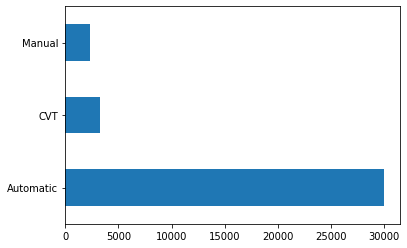

In [51]:
df2['transmission'].value_counts().plot(kind='barh')

Transmission column is cleaned for initial exploration.

In [52]:
# Checking progress
df2.isnull().sum()

first_date_seen       0
last_date_seen        0
year                  0
make                  0
model                 0
mileage              73
price                 0
body_type             0
drivetrain            0
transmission          0
fuel_type             0
engine                0
description        2895
carfax_report         0
is_private            0
city                  0
province              0
dtype: int64

In [53]:
df2['mileage'].fillna(df['mileage'].mean(), inplace=True)

Very little NULLs in mileage, so I think I can safely fill them with the mean. It will not skew model results. Also, only 16 NULLs in seller_name, meaning an easy fill to remove it from causing problems with a dataset this large.

In [54]:
df2.isnull().sum()

first_date_seen       0
last_date_seen        0
year                  0
make                  0
model                 0
mileage               0
price                 0
body_type             0
drivetrain            0
transmission          0
fuel_type             0
engine                0
description        2895
carfax_report         0
is_private            0
city                  0
province              0
dtype: int64

---

##### Question in my mind: What would be a good measure of success for a business insight?
##### As a car sales business, having inventory that moves quickly and does not sit is always a good measure to check.

I want to create a column that shows the difference in days when the car was purchased by the company, versus when it was sold. The higher the number, the longer the vehicle sat without being sold.

In [55]:
# I can change some datatypes to a more usable format, like the dates into datetime
df2['first_date_seen'] = pd.to_datetime(df['first_date_seen'])
df2['last_date_seen'] = pd.to_datetime(df['last_date_seen'])

In [56]:
# Create a column that flags whether a trip was made during business hours or not.
df2['days_until_sold'] = (df2['last_date_seen'] - df2['first_date_seen']).dt.days

In [57]:
df2.dtypes

first_date_seen    datetime64[ns]
last_date_seen     datetime64[ns]
year                        int64
make                       object
model                      object
mileage                   float64
price                     float64
body_type                  object
drivetrain                 object
transmission               object
fuel_type                  object
engine                     object
description                object
carfax_report                bool
is_private                   bool
city                       object
province                   object
days_until_sold             int64
dtype: object

In [58]:
# Remove NULL descriptions before this goes to NLP sets.
df2.dropna(subset=['description'], inplace=True)
df2.reset_index(drop=True, inplace=True)
df2.shape

(32642, 18)

In [59]:
# Copy with word descriptions for NLP work.
df_nlp = df2.copy()

In [60]:
# Make a cleaned copy.
df2 = df2.drop(['description'], axis=1)
df_clean = df2.copy()
df2.shape

(32642, 17)

In [94]:
# Check on the clean version.
df_clean.head()

,first_date_seen,last_date_seen,year,make,model,mileage,price,body_type,drivetrain,transmission,fuel_type,engine,carfax_report,is_private,city,province,days_until_sold
0,2021-04-05,2021-05-03,2007,Pontiac,Grand Prix,166014.0,3000.0,Sedan,FWD,Automatic,Gasoline,Unknown,False,True,Mississauga,ON,28
1,2021-04-16,2021-05-03,2016,Acura,MDX,97902.0,24989.0,SUV,AWD,Automatic,Gasoline,6 Cylinder Engine,True,False,Milton,ON,17
2,2021-04-16,2021-05-03,2005,Infiniti,G35X,108000.0,6400.0,Sedan,AWD,Automatic,Gasoline,Unknown,False,True,Mississauga,ON,17
3,2021-04-08,2021-05-03,2016,Ford,F-150,186750.0,33821.0,Truck,4X4,Automatic,Gasoline,8 Cylinder Engine,True,False,Barrie,ON,25
4,2021-04-08,2021-05-03,2015,Honda,CR-V,124394.0,17443.0,SUV,AWD,Automatic,Gasoline,4 Cylinder Engine,True,False,North bay,ON,25


In [61]:
# Create a xlxs to import into Tableau or SQL for any further exploration or visualizations.
df_clean.to_excel('vehicles_cleaned.xlsx')

Data is now scrubbed of NULLs, but further cleaning during exploration can happen.

### Exploring the data

Questions:

In [62]:
# Average price of a car?
df_clean['price'].mean()

25422.07597573678

In [63]:
# What are the most expensive listings?
df_clean.sort_values('price', ascending=False).groupby('price').head()

,first_date_seen,last_date_seen,year,make,model,mileage,price,body_type,drivetrain,transmission,fuel_type,engine,carfax_report,is_private,city,province,days_until_sold
20378,2021-04-22,2021-05-03,2018,Ford,GT,3088.0,1399888.0,Sedan,RWD,Automatic,Gasoline,6 Cylinder Engine,False,False,Thornhill,ON,11
13122,2021-05-01,2021-05-03,2004,Porsche,Carrera GT,5190.0,1350000.0,Convertible,Other,Automatic,Gasoline,Unknown,False,False,Oakville,ON,2
12044,2021-04-10,2021-05-03,2015,Cadillac,ATS,85000.0,1210001.0,Sedan,AWD,Automatic,Gasoline,Unknown,False,True,Mississauga,ON,23
18208,2021-04-23,2021-05-03,2020,Ferrari,488,3163.0,749987.0,Sedan,RWD,Automatic,Gasoline,8 Cylinder Engine,True,False,Woodbridge,ON,10
52,2021-04-15,2021-05-03,2019,Lamborghini,Aventador,1637.0,715000.0,Sedan,AWD,Automatic,Gasoline,Other,False,False,Vaughan,ON,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23893,2021-04-25,2021-05-03,1973,Cadillac,Eldorado,95000.0,300.0,Convertible,FWD,Automatic,Gasoline,Unknown,False,True,Napanee,ON,8
12836,2021-04-13,2021-04-17,2005,GMC,Canyon,300000.0,300.0,Truck,RWD,Automatic,Gasoline,Unknown,False,True,Welland,ON,4
19541,2021-04-15,2021-04-30,2009,Mazda,Mazda3,40000.0,200.0,Sedan,FWD,Automatic,Gasoline,Unknown,False,True,Ajax,ON,15
29303,2021-05-02,2021-05-03,2004,Audi,S4,250000.0,100.0,Other,Other,Automatic,Gasoline,Unknown,False,True,Wasaga beach,ON,1


Luixury sports cars are expensive, yes.

In [64]:
# What is the average length of time to sell a listing?
df_clean['days_until_sold'].mean()

12.519576006372159

Some histograms and simple visualizations to see how vehicle turnover is related to different factors.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024EF8446348>,
      dtype=object)

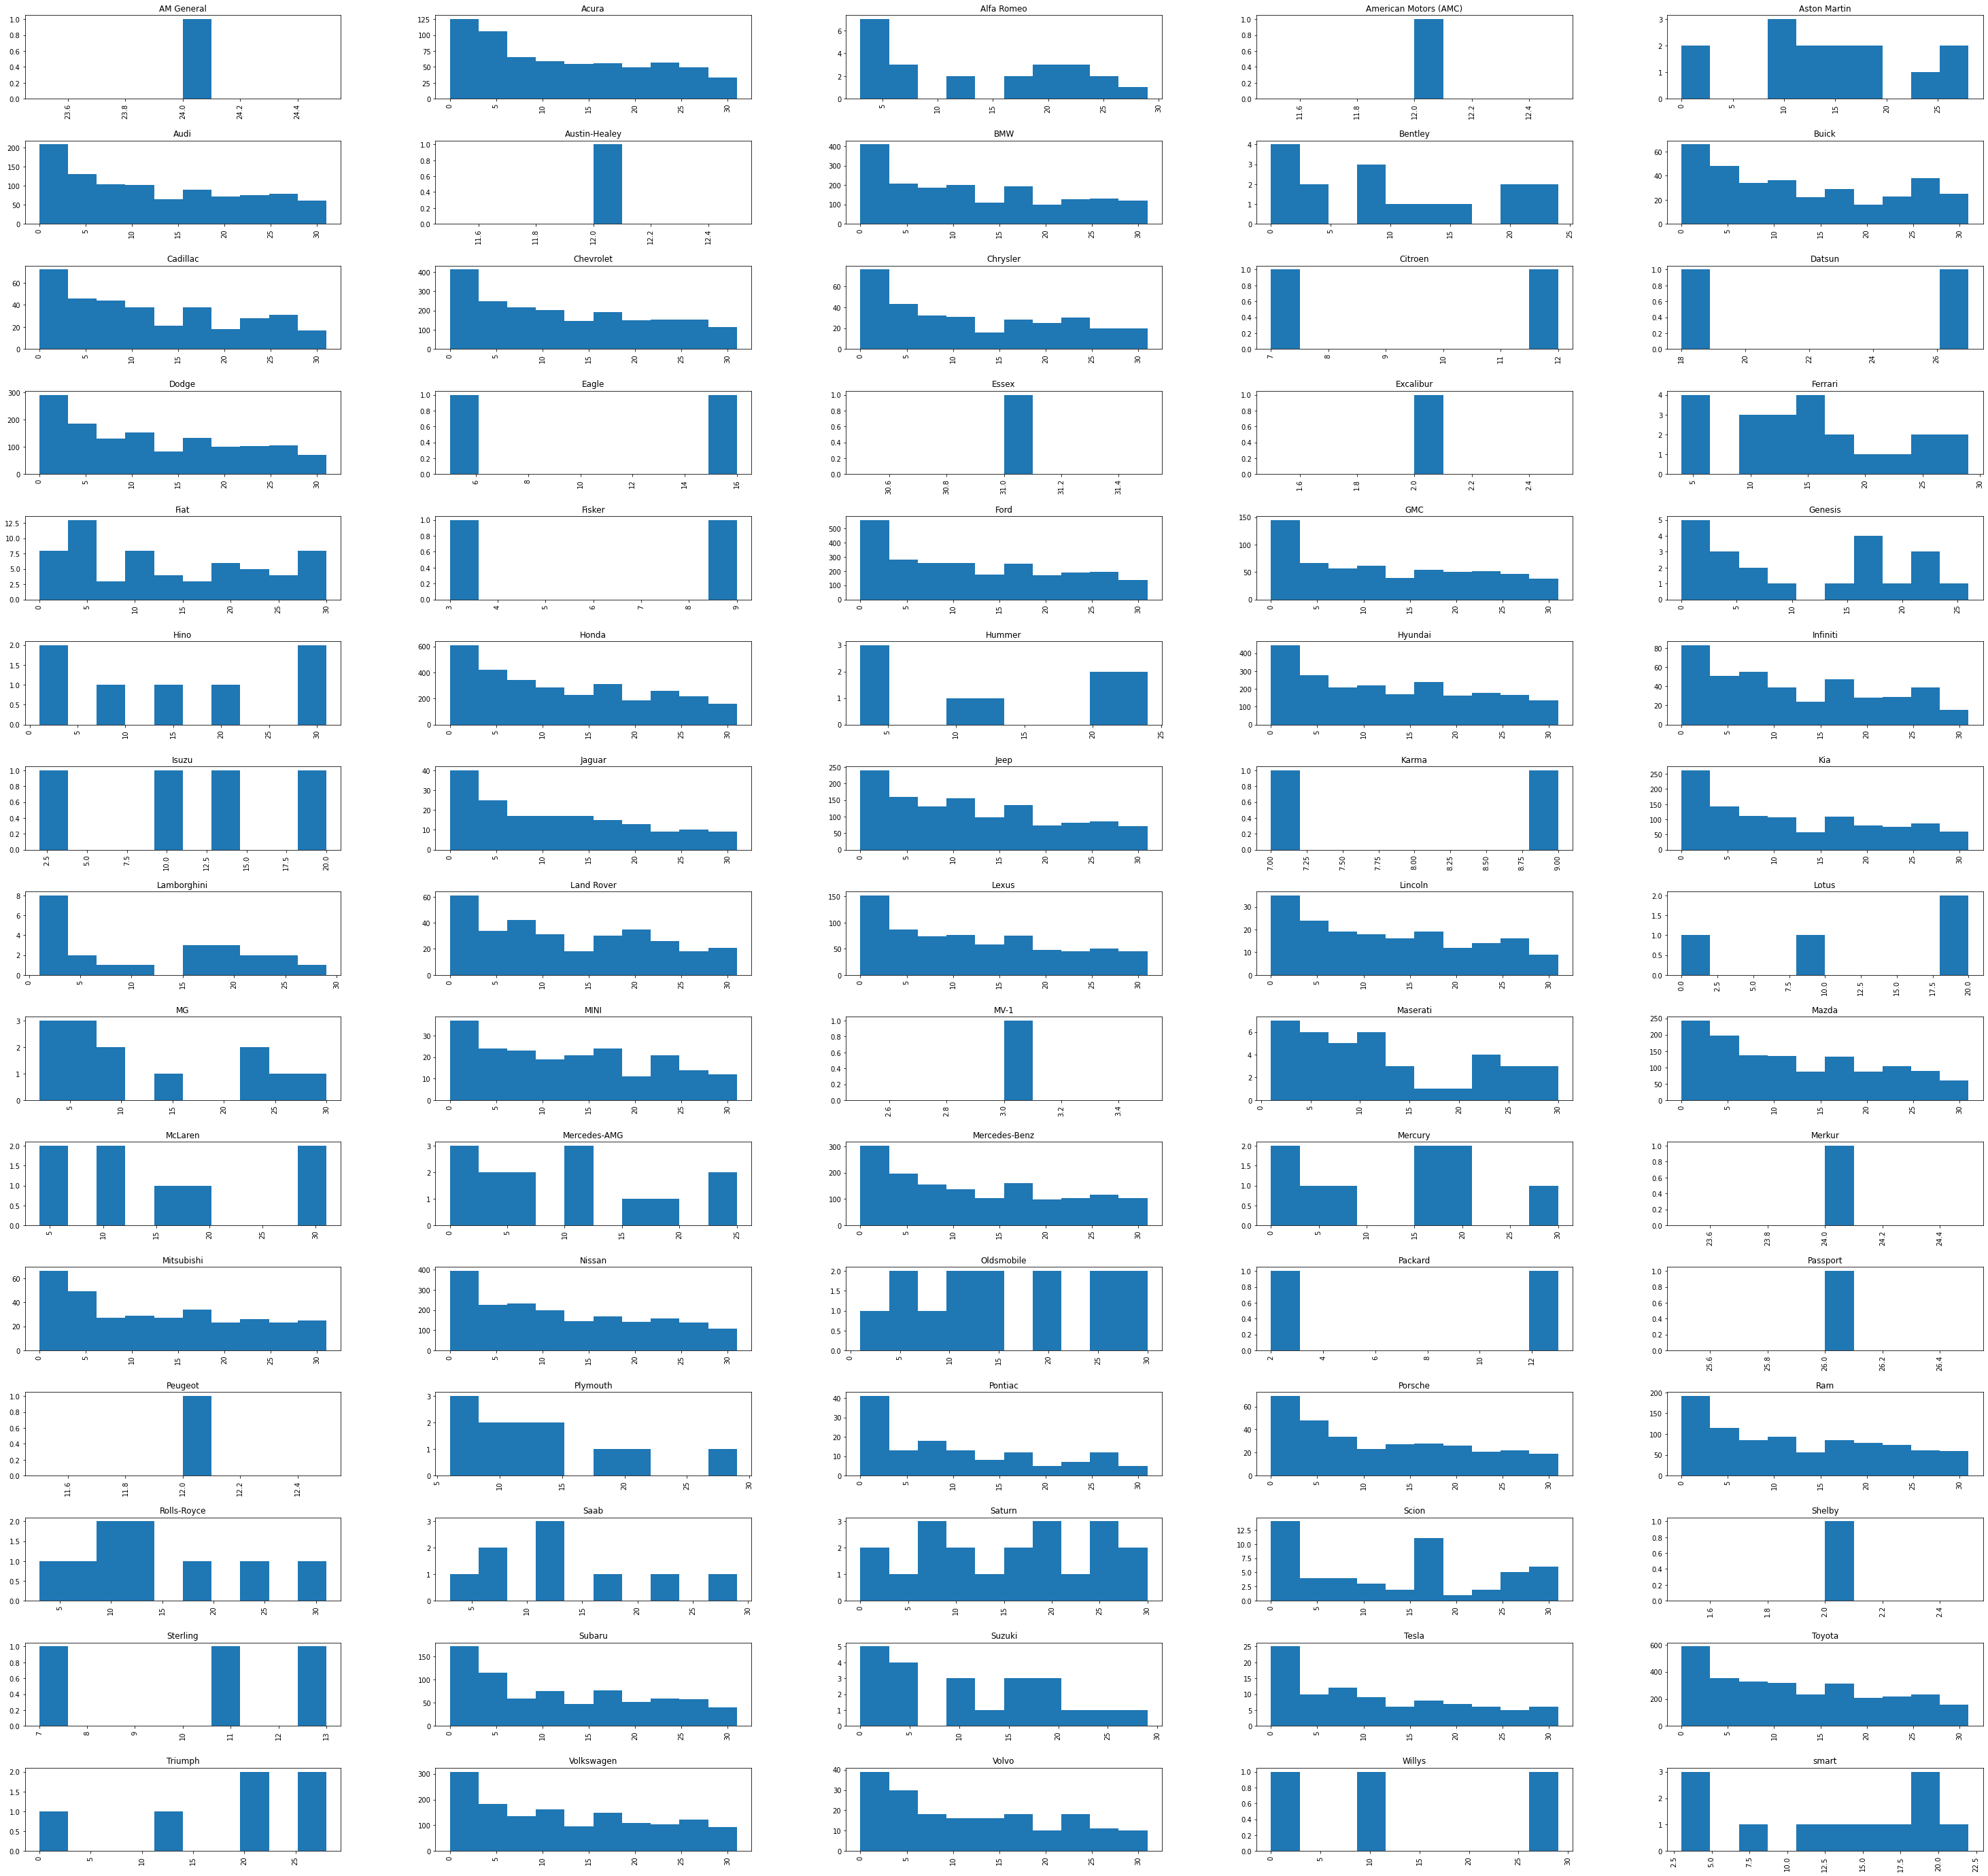

In [65]:
df_clean['days_until_sold'].hist(by=df_clean['make'], layout = (15,5), figsize=(50,50))

Some makes are more likely to stay in the inventory longer.

In [66]:
df_clean.sort_values(['make', 'days_until_sold'], axis=0).groupby('days_until_sold').head(5)

,first_date_seen,last_date_seen,year,make,model,mileage,price,body_type,drivetrain,transmission,fuel_type,engine,carfax_report,is_private,city,province,days_until_sold
7844,2021-04-09,2021-05-03,1985,AM General,Hummer,17200.0,40000.0,Truck,AWD,Automatic,Diesel,Unknown,False,True,London,ON,24
916,2021-04-09,2021-04-09,2009,Acura,MDX,207000.0,8250.0,Other,AWD,Automatic,Gasoline,Unknown,False,True,Hamilton,ON,0
2292,2021-04-19,2021-04-19,2012,Acura,TSX,162000.0,10998.0,Sedan,FWD,Automatic,Gasoline,4 Cylinder Engine,False,False,Burlington,ON,0
3216,2021-04-24,2021-04-24,2017,Acura,MDX,55819.0,32995.0,SUV,AWD,Automatic,Gasoline,Other,True,False,Brampton,ON,0
3568,2021-04-21,2021-04-21,2017,Acura,TLX,74678.0,22990.0,Sedan,AWD,Automatic,Gasoline,Other,False,False,Ontario,ON,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7973,2021-04-02,2021-05-03,2013,Acura,ILX,195100.0,8995.0,Sedan,FWD,Manual,Gasoline,4 Cylinder Engine,True,False,Oakville,ON,31
9055,2021-04-02,2021-05-03,2018,Acura,TLX,60124.0,25900.0,Sedan,FWD,Automatic,Gasoline,4 Cylinder Engine,True,False,Kitchener,ON,31
12985,2021-04-02,2021-05-03,2020,Acura,RDX,29811.0,43988.0,SUV,AWD,Automatic,Gasoline,4 Cylinder Engine,True,False,Mississauga,ON,31
14741,2021-04-02,2021-05-03,2015,Acura,RDX,153422.0,16487.0,SUV,AWD,Automatic,Gasoline,4 Cylinder Engine,False,False,Barrie,ON,31


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E8608B348>,
      dtype=object)

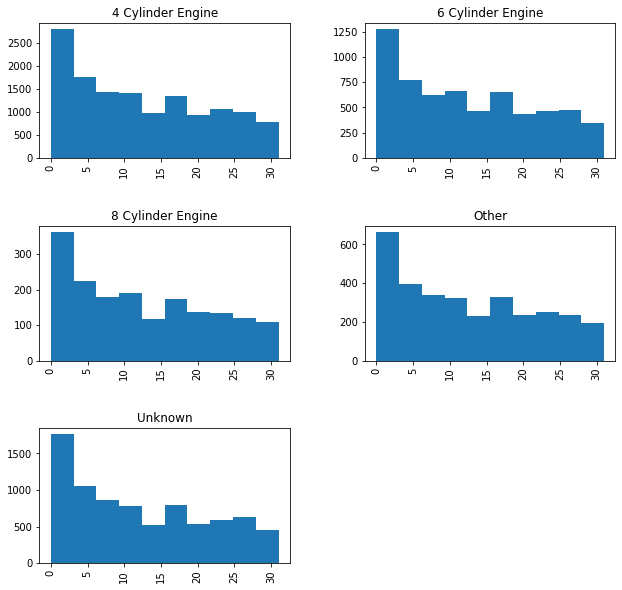

In [67]:
df_clean['days_until_sold'].hist(by=df_clean['engine'], figsize=(10,10))

In [68]:
# Need to numerize the df so that I can get the correlation between columns that were originally not numeric.
# This way, I can glean the correlation between make, model, body_type, and other descriptive factors and how quickly a vehicle sold.
df_numerized = df_clean.copy()

# For each column in the dataframe, if the type is object, change it into category.
# Earlier I determined their datatypes during cleaning.
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        # This gives it the category number.
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

,first_date_seen,last_date_seen,year,make,model,mileage,price,body_type,drivetrain,transmission,fuel_type,engine,carfax_report,is_private,city,province,days_until_sold
0,2021-04-05,2021-05-03,2007,57,705,166014.0,3000.0,4,4,0,3,4,False,True,309,0,28
1,2021-04-16,2021-05-03,2016,1,825,97902.0,24989.0,3,3,0,3,1,True,False,306,0,17
2,2021-04-16,2021-05-03,2005,29,623,108000.0,6400.0,4,3,0,3,4,False,True,309,0,17
3,2021-04-08,2021-05-03,2016,22,568,186750.0,33821.0,5,2,0,3,2,True,False,32,0,25
4,2021-04-08,2021-05-03,2015,26,362,124394.0,17443.0,3,3,0,3,0,True,False,346,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32637,2021-04-07,2021-05-03,2019,26,362,10175.0,27795.0,3,3,1,3,0,True,False,301,0,26
32638,2021-04-09,2021-04-09,2014,69,443,180276.0,8495.0,4,4,0,3,2,True,False,560,0,0
32639,2021-04-20,2021-05-03,2017,15,764,100584.0,19499.0,3,3,0,3,1,False,False,257,0,13
32640,2021-04-07,2021-04-30,2017,26,272,73000.0,25999.0,4,4,1,3,0,False,False,309,0,23


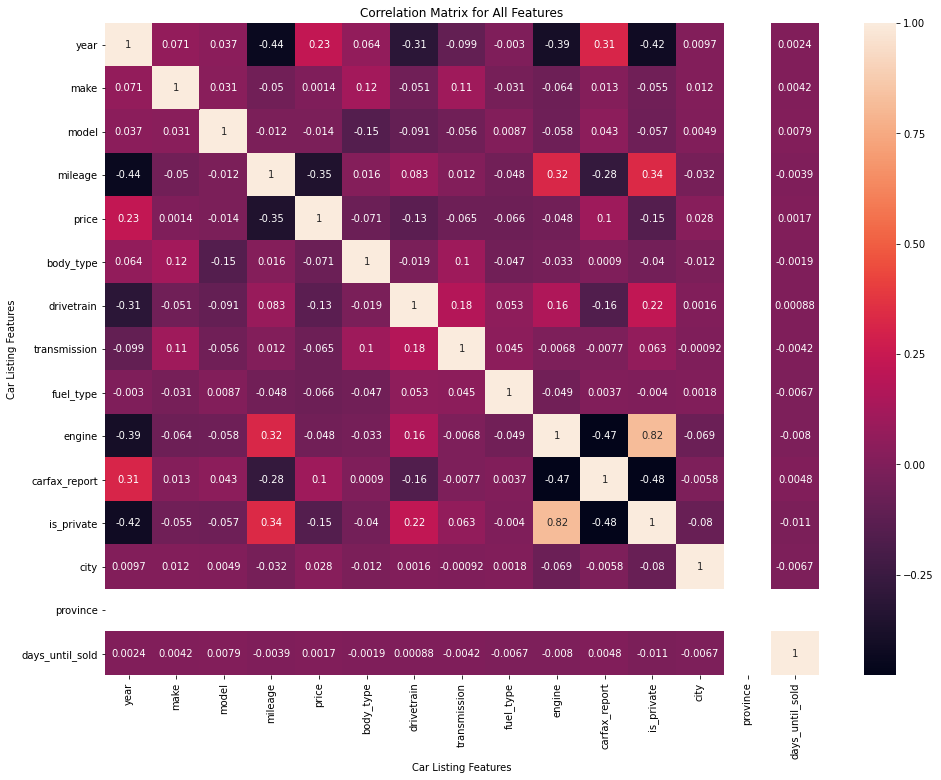

In [69]:
# Heatmap for better visualization for every single field in the data.
correlation_matrix = df_numerized.corr(method = 'pearson')
plt.figure(figsize = (16,12))
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for All Features')
plt.xlabel('Car Listing Features')
plt.ylabel('Car Listing Features')
plt.show()

Price of a vehicle is correlated with Year, and whether it has a Carfax Report performed on it, and negatively correlated with mileage.

In [95]:
# Organize to quickly know the most correlated features.
correlation_matrix = df_numerized.corr()
correlation_pairs = correlation_matrix.unstack()
correlation_pairs = correlation_pairs.sort_values()
high_correlation = correlation_pairs[(correlation_pairs) > 0.2]
high_correlation

drivetrain       is_private         0.222764
is_private       drivetrain         0.222764
price            year               0.226714
year             price              0.226714
carfax_report    year               0.314935
year             carfax_report      0.314935
engine           mileage            0.320150
mileage          engine             0.320150
is_private       mileage            0.335079
mileage          is_private         0.335079
engine           is_private         0.816331
is_private       engine             0.816331
year             year               1.000000
is_private       is_private         1.000000
carfax_report    carfax_report      1.000000
engine           engine             1.000000
fuel_type        fuel_type          1.000000
transmission     transmission       1.000000
drivetrain       drivetrain         1.000000
body_type        body_type          1.000000
price            price              1.000000
mileage          mileage            1.000000
model     

The cleaned dataframe was exported and imported into SQL for some exploration as well as imported to Tableau for some visualizations regarding how long a listing takes to sell.

The next section will explore cleaning the data for Natural Language Processing as well, in order to try to build a recommendation system based on how a listing is described. With more time, this could be expanded to show which words or patterns of words used to describe a listing are correlated to selling a listing more quickly. 

### NLP Word Clustering

Keeping with using my 'Days Until Sold' metric to measure success, what words in the vehicle Description are associated with faster turn over?
Or maybe a recommender system to send users to similar description cars to keep them using the service?

In [71]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import TruncatedSVD
import wordcloud

In [72]:
df_nlp.head()

,first_date_seen,last_date_seen,year,make,model,mileage,price,body_type,drivetrain,transmission,fuel_type,engine,description,carfax_report,is_private,city,province,days_until_sold
0,2021-04-05,2021-05-03,2007,Pontiac,Grand Prix,166014.0,3000.0,Sedan,FWD,Automatic,Gasoline,Unknown,"Pontiac Grand Prix 2007, mint condition, clean...",False,True,Mississauga,ON,28
1,2021-04-16,2021-05-03,2016,Acura,MDX,97902.0,24989.0,SUV,AWD,Automatic,Gasoline,6 Cylinder Engine,2016 Acura MDX SH-AWD equipped with 3.5L V6 en...,True,False,Milton,ON,17
2,2021-04-16,2021-05-03,2005,Infiniti,G35X,108000.0,6400.0,Sedan,AWD,Automatic,Gasoline,Unknown,"Runs very smooth just safetied last week, no d...",False,True,Mississauga,ON,17
3,2021-04-08,2021-05-03,2016,Ford,F-150,186750.0,33821.0,Truck,4X4,Automatic,Gasoline,8 Cylinder Engine,"At Barrie Ford, we've proudly dedicated oursel...",True,False,Barrie,ON,25
4,2021-04-08,2021-05-03,2015,Honda,CR-V,124394.0,17443.0,SUV,AWD,Automatic,Gasoline,4 Cylinder Engine,"EX, AWD, Cloth Interior, Power Drivers Seat, H...",True,False,North bay,ON,25


In [73]:
# Remove rows with NULL descriptions. We do not need them for this portion when the loss is so small.
df_nlp.dropna()

,first_date_seen,last_date_seen,year,make,model,mileage,price,body_type,drivetrain,transmission,fuel_type,engine,description,carfax_report,is_private,city,province,days_until_sold
0,2021-04-05,2021-05-03,2007,Pontiac,Grand Prix,166014.0,3000.0,Sedan,FWD,Automatic,Gasoline,Unknown,"Pontiac Grand Prix 2007, mint condition, clean...",False,True,Mississauga,ON,28
1,2021-04-16,2021-05-03,2016,Acura,MDX,97902.0,24989.0,SUV,AWD,Automatic,Gasoline,6 Cylinder Engine,2016 Acura MDX SH-AWD equipped with 3.5L V6 en...,True,False,Milton,ON,17
2,2021-04-16,2021-05-03,2005,Infiniti,G35X,108000.0,6400.0,Sedan,AWD,Automatic,Gasoline,Unknown,"Runs very smooth just safetied last week, no d...",False,True,Mississauga,ON,17
3,2021-04-08,2021-05-03,2016,Ford,F-150,186750.0,33821.0,Truck,4X4,Automatic,Gasoline,8 Cylinder Engine,"At Barrie Ford, we've proudly dedicated oursel...",True,False,Barrie,ON,25
4,2021-04-08,2021-05-03,2015,Honda,CR-V,124394.0,17443.0,SUV,AWD,Automatic,Gasoline,4 Cylinder Engine,"EX, AWD, Cloth Interior, Power Drivers Seat, H...",True,False,North bay,ON,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32637,2021-04-07,2021-05-03,2019,Honda,CR-V,10175.0,27795.0,SUV,AWD,CVT,Gasoline,4 Cylinder Engine,Recent Arrival! Highlighted Features: 17 Alumi...,True,False,Midland,ON,26
32638,2021-04-09,2021-04-09,2014,Toyota,Corolla,180276.0,8495.0,Sedan,FWD,Automatic,Gasoline,8 Cylinder Engine,LE | Back Up Camera | Heated Seats |Automatic ...,True,False,Woodbridge,ON,0
32639,2021-04-20,2021-05-03,2017,Dodge,Journey,100584.0,19499.0,SUV,AWD,Automatic,Gasoline,6 Cylinder Engine,Absolutely Great Vehicle! Loaded! Rear DVD! Fe...,False,False,Kingston,ON,13
32640,2021-04-07,2021-04-30,2017,Honda,Accord Coupe,73000.0,25999.0,Sedan,FWD,CVT,Gasoline,4 Cylinder Engine,**RARE** **Mint (Like New)** **White on Black ...,False,False,Mississauga,ON,23


In [74]:
# Remove HTML elements.
df_nlp['clean_description'] = df_nlp['description'].str.replace(r"<[a-z/]+>", " ")

# Remove special characters and numbers.
df_nlp['clean_description'] = df_nlp['clean_description'].str.replace(r"[^A-Za-z]+", " ") 
print('Description cleaned of the first vehicle : ',df_nlp.loc[0,'clean_description'])

C:\Users\saleh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\saleh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


Description cleaned of the first vehicle :  Pontiac Grand Prix mint condition clean runs well low mileage 


In [75]:
# Change all characters into lower case
df_nlp['clean_description'] = df_nlp['clean_description'].str.lower()
print('Description in lower case of the first vehicle : ',df_nlp.loc[0,'clean_description'])

Description in lower case of the first vehicle :  pontiac grand prix mint condition clean runs well low mileage 


Next, I can Tokenize the description words.
Tokenization is a way of separating a piece of text into smaller units called tokens. Tokens can be either words, characters, or subwords.

In [76]:
# DF Type Check
df_nlp.dtypes

first_date_seen      datetime64[ns]
last_date_seen       datetime64[ns]
year                          int64
make                         object
model                        object
mileage                     float64
price                       float64
body_type                    object
drivetrain                   object
transmission                 object
fuel_type                    object
engine                       object
description                  object
carfax_report                  bool
is_private                     bool
city                         object
province                     object
days_until_sold               int64
clean_description            object
dtype: object

In [77]:
# Tokenizing the words to separate them.
df_nlp['clean_description'] = df_nlp['clean_description'].astype(str)
df_nlp['clean_tokens'] = df_nlp['clean_description'].apply(lambda x: nlp(x))
df_nlp.head()

,first_date_seen,last_date_seen,year,make,model,mileage,price,body_type,drivetrain,transmission,fuel_type,engine,description,carfax_report,is_private,city,province,days_until_sold,clean_description,clean_tokens
0,2021-04-05,2021-05-03,2007,Pontiac,Grand Prix,166014.0,3000.0,Sedan,FWD,Automatic,Gasoline,Unknown,"Pontiac Grand Prix 2007, mint condition, clean...",False,True,Mississauga,ON,28,pontiac grand prix mint condition clean runs w...,"(pontiac, grand, prix, mint, condition, clean,..."
1,2021-04-16,2021-05-03,2016,Acura,MDX,97902.0,24989.0,SUV,AWD,Automatic,Gasoline,6 Cylinder Engine,2016 Acura MDX SH-AWD equipped with 3.5L V6 en...,True,False,Milton,ON,17,acura mdx sh awd equipped with l v engine spe...,"( , acura, mdx, sh, awd, equipped, with, l, v,..."
2,2021-04-16,2021-05-03,2005,Infiniti,G35X,108000.0,6400.0,Sedan,AWD,Automatic,Gasoline,Unknown,"Runs very smooth just safetied last week, no d...",False,True,Mississauga,ON,17,runs very smooth just safetied last week no da...,"(runs, very, smooth, just, safetied, last, wee..."
3,2021-04-08,2021-05-03,2016,Ford,F-150,186750.0,33821.0,Truck,4X4,Automatic,Gasoline,8 Cylinder Engine,"At Barrie Ford, we've proudly dedicated oursel...",True,False,Barrie,ON,25,at barrie ford we ve proudly dedicated ourselv...,"(at, barrie, ford, we, ve, proudly, dedicated,..."
4,2021-04-08,2021-05-03,2015,Honda,CR-V,124394.0,17443.0,SUV,AWD,Automatic,Gasoline,4 Cylinder Engine,"EX, AWD, Cloth Interior, Power Drivers Seat, H...",True,False,North bay,ON,25,ex awd cloth interior power drivers seat heate...,"(ex, awd, cloth, interior, power, drivers, sea..."


In [78]:
# Removing stop words from the description words.
from spacy.lang.en.stop_words import STOP_WORDS

df_nlp['clean_tokens'] = df_nlp['clean_tokens'].apply(lambda x: [token.lemma_ for token in x if token.text not in STOP_WORDS])
df_nlp.head()

,first_date_seen,last_date_seen,year,make,model,mileage,price,body_type,drivetrain,transmission,fuel_type,engine,description,carfax_report,is_private,city,province,days_until_sold,clean_description,clean_tokens
0,2021-04-05,2021-05-03,2007,Pontiac,Grand Prix,166014.0,3000.0,Sedan,FWD,Automatic,Gasoline,Unknown,"Pontiac Grand Prix 2007, mint condition, clean...",False,True,Mississauga,ON,28,pontiac grand prix mint condition clean runs w...,"[pontiac, grand, prix, mint, condition, clean,..."
1,2021-04-16,2021-05-03,2016,Acura,MDX,97902.0,24989.0,SUV,AWD,Automatic,Gasoline,6 Cylinder Engine,2016 Acura MDX SH-AWD equipped with 3.5L V6 en...,True,False,Milton,ON,17,acura mdx sh awd equipped with l v engine spe...,"[ , acura, mdx, sh, awd, equip, l, v, engine, ..."
2,2021-04-16,2021-05-03,2005,Infiniti,G35X,108000.0,6400.0,Sedan,AWD,Automatic,Gasoline,Unknown,"Runs very smooth just safetied last week, no d...",False,True,Mississauga,ON,17,runs very smooth just safetied last week no da...,"[run, smooth, safetie, week, dash, light, fres..."
3,2021-04-08,2021-05-03,2016,Ford,F-150,186750.0,33821.0,Truck,4X4,Automatic,Gasoline,8 Cylinder Engine,"At Barrie Ford, we've proudly dedicated oursel...",True,False,Barrie,ON,25,at barrie ford we ve proudly dedicated ourselv...,"[barrie, ford, ve, proudly, dedicate, serve, a..."
4,2021-04-08,2021-05-03,2015,Honda,CR-V,124394.0,17443.0,SUV,AWD,Automatic,Gasoline,4 Cylinder Engine,"EX, AWD, Cloth Interior, Power Drivers Seat, H...",True,False,North bay,ON,25,ex awd cloth interior power drivers seat heate...,"[ex, awd, cloth, interior, power, driver, seat..."


In [79]:
# Put back tokens into one single string
df_nlp["clean_document"] = [" ".join(x) for x in df_nlp['clean_tokens']]
df_nlp.head()

,first_date_seen,last_date_seen,year,make,model,mileage,price,body_type,drivetrain,transmission,...,engine,description,carfax_report,is_private,city,province,days_until_sold,clean_description,clean_tokens,clean_document
0,2021-04-05,2021-05-03,2007,Pontiac,Grand Prix,166014.0,3000.0,Sedan,FWD,Automatic,...,Unknown,"Pontiac Grand Prix 2007, mint condition, clean...",False,True,Mississauga,ON,28,pontiac grand prix mint condition clean runs w...,"[pontiac, grand, prix, mint, condition, clean,...",pontiac grand prix mint condition clean run lo...
1,2021-04-16,2021-05-03,2016,Acura,MDX,97902.0,24989.0,SUV,AWD,Automatic,...,6 Cylinder Engine,2016 Acura MDX SH-AWD equipped with 3.5L V6 en...,True,False,Milton,ON,17,acura mdx sh awd equipped with l v engine spe...,"[ , acura, mdx, sh, awd, equip, l, v, engine, ...",acura mdx sh awd equip l v engine speed auto...
2,2021-04-16,2021-05-03,2005,Infiniti,G35X,108000.0,6400.0,Sedan,AWD,Automatic,...,Unknown,"Runs very smooth just safetied last week, no d...",False,True,Mississauga,ON,17,runs very smooth just safetied last week no da...,"[run, smooth, safetie, week, dash, light, fres...",run smooth safetie week dash light fresh oil c...
3,2021-04-08,2021-05-03,2016,Ford,F-150,186750.0,33821.0,Truck,4X4,Automatic,...,8 Cylinder Engine,"At Barrie Ford, we've proudly dedicated oursel...",True,False,Barrie,ON,25,at barrie ford we ve proudly dedicated ourselv...,"[barrie, ford, ve, proudly, dedicate, serve, a...",barrie ford ve proudly dedicate serve automoti...
4,2021-04-08,2021-05-03,2015,Honda,CR-V,124394.0,17443.0,SUV,AWD,Automatic,...,4 Cylinder Engine,"EX, AWD, Cloth Interior, Power Drivers Seat, H...",True,False,North bay,ON,25,ex awd cloth interior power drivers seat heate...,"[ex, awd, cloth, interior, power, driver, seat...",ex awd cloth interior power driver seat heated...


Now I have a cleaned description dataset to test NLP models on to try something.

TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.

This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

In [80]:
# TF-IDF vector.
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_nlp["clean_document"])

# X is a generator. I can transform that as an array.
X = X.toarray()
print(X.shape)

(32642, 20415)


In [81]:
# Print the 50 first words into our vocabulary
print(sorted(vectorizer.vocabulary_.items())[:50])

[('aa', 0), ('aaa', 1), ('aaaautosale', 2), ('aab', 3), ('aac', 4), ('aacanadainc', 5), ('aahidenkz', 6), ('aaixg', 7), ('aal', 8), ('aam', 9), ('aamco', 10), ('aaq', 11), ('aaron', 12), ('aax', 13), ('ab', 14), ('abachi', 15), ('abaiss', 16), ('abarth', 17), ('abc', 18), ('abd', 19), ('abdz', 20), ('abe', 21), ('abel', 22), ('aberfoyle', 23), ('abf', 24), ('abide', 25), ('ability', 26), ('abit', 27), ('abl', 28), ('ablack', 29), ('able', 30), ('aboard', 31), ('aboiut', 32), ('abound', 33), ('abroad', 34), ('abs', 35), ('absence', 36), ('absm', 37), ('absolute', 38), ('absolutefinecar', 39), ('absolutely', 40), ('absolutelystunne', 41), ('absolutley', 42), ('absorb', 43), ('absorber', 44), ('absorbersfront', 45), ('absorbersm', 46), ('absorbing', 47), ('abundance', 48), ('abundant', 49)]


In [82]:
# Create a dataframe with tf-idf
X_df = pd.DataFrame(X, 
             columns=vectorizer.get_feature_names(), 
             index=["item_{}".format(x) for x in range(df_nlp.shape[0])] )

X_df.head()

,aa,aaa,aaaautosale,aab,aac,aacanadainc,aahidenkz,aaixg,aal,aam,...,zxqx,zxt,zxu,zy,zyu,zz,zzacc,zzj,zzp,zztnghdy
item_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
item_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
item_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
item_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
item_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
# Clustering words in the description using DBSCAN.
clustering = DBSCAN(eps=0.7, min_samples=3, metric="cosine", algorithm="brute")

# Fit on data 
#No need to normalize data, it already is due to TF-IDF
clustering.fit(X)

# Write cluster ids into df_nlp and X_df
df_nlp['cluster_id'] = clustering.labels_
display(df_nlp.head())
X_df['cluster_id'] = clustering.labels_
display(X_df.head())

,first_date_seen,last_date_seen,year,make,model,mileage,price,body_type,drivetrain,transmission,...,description,carfax_report,is_private,city,province,days_until_sold,clean_description,clean_tokens,clean_document,cluster_id
0,2021-04-05,2021-05-03,2007,Pontiac,Grand Prix,166014.0,3000.0,Sedan,FWD,Automatic,...,"Pontiac Grand Prix 2007, mint condition, clean...",False,True,Mississauga,ON,28,pontiac grand prix mint condition clean runs w...,"[pontiac, grand, prix, mint, condition, clean,...",pontiac grand prix mint condition clean run lo...,0
1,2021-04-16,2021-05-03,2016,Acura,MDX,97902.0,24989.0,SUV,AWD,Automatic,...,2016 Acura MDX SH-AWD equipped with 3.5L V6 en...,True,False,Milton,ON,17,acura mdx sh awd equipped with l v engine spe...,"[ , acura, mdx, sh, awd, equip, l, v, engine, ...",acura mdx sh awd equip l v engine speed auto...,0
2,2021-04-16,2021-05-03,2005,Infiniti,G35X,108000.0,6400.0,Sedan,AWD,Automatic,...,"Runs very smooth just safetied last week, no d...",False,True,Mississauga,ON,17,runs very smooth just safetied last week no da...,"[run, smooth, safetie, week, dash, light, fres...",run smooth safetie week dash light fresh oil c...,0
3,2021-04-08,2021-05-03,2016,Ford,F-150,186750.0,33821.0,Truck,4X4,Automatic,...,"At Barrie Ford, we've proudly dedicated oursel...",True,False,Barrie,ON,25,at barrie ford we ve proudly dedicated ourselv...,"[barrie, ford, ve, proudly, dedicate, serve, a...",barrie ford ve proudly dedicate serve automoti...,0
4,2021-04-08,2021-05-03,2015,Honda,CR-V,124394.0,17443.0,SUV,AWD,Automatic,...,"EX, AWD, Cloth Interior, Power Drivers Seat, H...",True,False,North bay,ON,25,ex awd cloth interior power drivers seat heate...,"[ex, awd, cloth, interior, power, driver, seat...",ex awd cloth interior power driver seat heated...,0


,aa,aaa,aaaautosale,aab,aac,aacanadainc,aahidenkz,aaixg,aal,aam,...,zxt,zxu,zy,zyu,zz,zzacc,zzj,zzp,zztnghdy,cluster_id
item_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
item_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
item_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
item_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
item_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [84]:
X_df

,aa,aaa,aaaautosale,aab,aac,aacanadainc,aahidenkz,aaixg,aal,aam,...,zxt,zxu,zy,zyu,zz,zzacc,zzj,zzp,zztnghdy,cluster_id
item_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
item_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
item_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
item_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
item_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
item_32637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
item_32638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
item_32639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
item_32640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Each line of X correspond to a vehicle description.
Each column of X correspond to a word in the vocabulary.
So each cell of X correspond to the score TF-IDF for a word into a vehicle description.

In [85]:
# Number of documents in each cluster
df_nlp['cluster_id'].value_counts()

 0      28622
-1       1946
 2        119
 9         65
 48        51
        ...  
 171        3
 179        3
 131        3
 134        3
 180        3
Name: cluster_id, Length: 184, dtype: int64

In [86]:
# Print sample of 3 documents for the 5 first cluster
for c in df_nlp['cluster_id'].value_counts().index[:5] :
    print("CLUSTER ", c , ' :')
    print('----')
    for d in df_nlp.loc[df_nlp['cluster_id']==c,:].sample(3)['clean_description']:
        print(d)
        print()
    print('-----------')

CLUSTER  0  :
----
this vehicle is being offered as is or as traded the price reflects the vehicles condition and mileage the vehicle does not come with a safety however we are happy to perform a pre safety inspection and safety certification at the interested party s own expense we advise all interested party s to view and inspect the vehicle in person check out our other wholesale vehicles for sale here https www petrieford com wholesale inventory used kingston check out our safety and e tested used inventory here https www petrieford com used cars kingston our ford canada certified pre owned vehicles all come with a year km warranty and financing as low as oac inventory here http www petrieford com used cars kingston cert m per omvic regulation requirements please read this disclaimer this vehicle is being sold as is unfit not e tested and is not represented as being in road worthy condition mechanically sound or maintained at any guaranteed level of quality the vehicle may not be f

In [87]:
# 5 Most frequent words in each cluster
cols = [c for c in X_df.columns if c!='cluster_id']

for c in df_nlp['cluster_id'].value_counts().index[:5] :
    print("CLUSTER ", c)
    print(X_df.loc[X_df['cluster_id']==c,cols].mean(axis=0).sort_values(ascending=False)[0:5])
    print('-----------')

CLUSTER  0
vehicle    0.069495
car        0.040724
power      0.038383
seat       0.035133
wheel      0.031806
dtype: float64
-----------
CLUSTER  -1
car       0.046348
new       0.039270
tire      0.034550
winter    0.027209
seat      0.025237
dtype: float64
-----------
CLUSTER  2
pricing             0.191662
special             0.182472
ourknowledgeable    0.147375
autoadvantage       0.147375
orcome              0.147375
dtype: float64
-----------
CLUSTER  9
bourgeois         0.422660
midland           0.353199
text              0.211966
disappointment    0.189217
cranston          0.165879
dtype: float64
-----------
CLUSTER  48
cedarauto     0.272235
london        0.222505
atmosphere    0.182479
carproof      0.177693
vehicle       0.163936
dtype: float64
-----------


CLUSTER  0


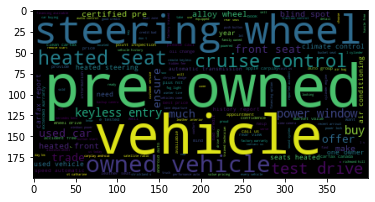

-----------
CLUSTER  -1


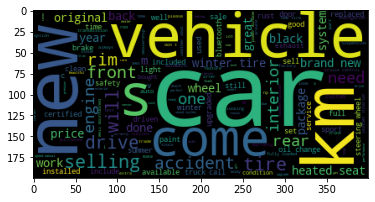

-----------
CLUSTER  2


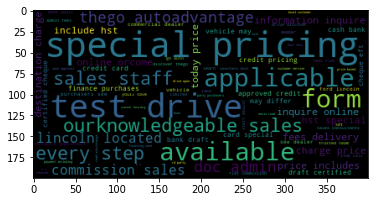

-----------
CLUSTER  9


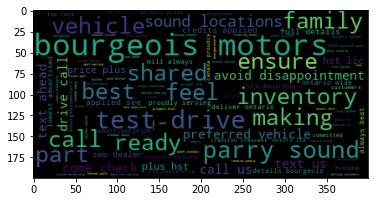

-----------
CLUSTER  48


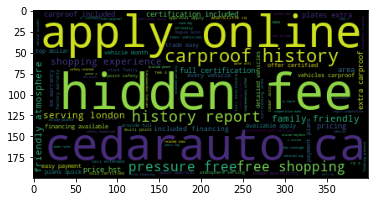

-----------


In [88]:
# Word cloud for the 5 first clusters
wd = wordcloud.WordCloud()
for c in df_nlp['cluster_id'].value_counts().index[:5] :
    print("CLUSTER ", c)
    texts = " ".join(df_nlp.loc[df_nlp['cluster_id']==c,'clean_description'])
    cloud = wd.generate(texts)
    plt.imshow(cloud)
    plt.show()
    print('-----------')

In [89]:
# Double check everything again.
df_nlp.head()
df_nlp.shape

(32642, 22)

### Recommendation System

Using the cleaned text data, I can use the preprocessed text to create a recommendation system for users.

In [90]:
# Make function to find similar car
df_nlp['id'] = df_nlp.index

def find_similar_vehicles(vehicle_id):
    """
    Return 5 vehicle ids belonging to the same cluster as vehicle id
    """
    cluster_id = df_nlp.loc[df_nlp['id']==vehicle_id, 'cluster_id'].values[0]
    similar_vehicles = df_nlp.loc[df_nlp['cluster_id']==cluster_id,:].sample(5)
    similar_vehicle_ids = similar_vehicles['id'].unique()
    return similar_vehicle_ids

In [91]:
# For printing in colors
class bcolors:
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'

In [92]:
# Testing recommendation system, run, and use a number from 0 to 35,537, or an item in the vehicle listing.
vehicle_id = int(input("What vehicle would you like to see ? "))
print()
try:
    vehicle_desc = df_nlp.loc[df_nlp['id']==vehicle_id, 'clean_description'].values[0]
except:
    print('Vehicle not found in database. Please enter a valid vehicle id.')
else:
    print(f"{bcolors.OKBLUE}Vehicle found in database, description below :")
    print(vehicle_desc)
    print()
    
    print("Based on the analysis of the vehicles' descriptions, you might also be interested by the following vehicles : ")
    print()

    for i in find_similar_vehicles(vehicle_id):
        print(f"{bcolors.OKGREEN}Item #", i)
        print(df_nlp.loc[df_nlp['id']==i, 'clean_description'].values[0])
        print(df_nlp.loc[df_nlp['id']==i, 'make'].values[0])
        print(df_nlp.loc[df_nlp['id']==i, 'model'].values[0])
        print(df_nlp.loc[df_nlp['id']==i, 'year'].values[0])
        print(df_nlp.loc[df_nlp['id']==i, 'price'].values[0])
        print('--------------------')

What vehicle would you like to see ?  1



Vehicle found in database, description below :
 acura mdx sh awd equipped with l v engine speed automatic transmission all wheel drive leather upholstered heated front seats touchscreen display with back up camera power sun roof adaptive cruise control lane keeping assist tire pressure monitoring system am fm cd stereo premium sound system aux usb input power windows power locks power heated mirrors traction control stability control child safety locks and so much more call today to schedule a test drive our market value pricing philosophy means you receive a no haggle no hassle purchase experience and provides you with peace of mind knowing you are getting our best price upfront for many years gorruds auto has been synonymous with peace of mind and we have always looked for ways to be different and enhance our customers purchase and ownership experience we respect your time and by providing our unique market value pricing approach its just another way gorruds auto strives to be diffe

### Predicting Turnover Using Machine Learning on Vehicle Description

Could be a great next steps using more data, as well as more time.